In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install textgenie

     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 1.3 MB 10.4 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=614a695b3e1719fd3df64a2c0f970309154069d5a60ebc7829538701d68fb475
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
     |████████████████████████████████| 22.2 MB 2.0 MB/s 
     |████████████████████████████████| 4.0 MB 20.9 MB/s 
     |████████████████████████████████| 87 kB 5.0 MB/s 
     |████████████████████████████████| 81 kB 3.6 MB/s 
     |████████████████████████████████| 5.6 MB 16.8 MB/s 
     |████████████████████████████████| 5.6 MB 19.7 MB/s 
     |██████████

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import re
from nltk.stem import PorterStemmer

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import spacy

from collections import Counter

from difflib import SequenceMatcher

from textgenie import TextGenie
from googletrans import Translator

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def potter_text(words):
  ps = PorterStemmer()
  words=words.split() 

  cw=[]
  for w in words:
    cw.append(ps.stem(w))
  
  clean_text=" ".join(cw)
  return clean_text



def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " I am", phrase)
    return phrase
    
def preprocessing_for_DATA_AUG(i):   
    #lowercasing text
    i = i.lower()
    # "won\'t", "will not"  , "can\'t", "can not" , "n\'t", " not"....
    i = decontracted(i)
    #removing @user word
    i = re.sub(r'\s*[@]+\w+\s*', ' ', i)
    # #remove hashtag words
    # i =re.sub(r'\s*[#]+\w+\s*', ' ', i)
    # removing symbols from text
    i = re.sub(r'[^\w]', ' ', i)
    #removing 1 letter word from sentence
    i = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ',i)
    #reomving ! @ # $ ð from sentence
    i = re.sub('[!@#$ð]', ' ',i)
    #removing numbers from sentence
    i = re.sub("\d", ' ', i )
    # #removing words which lenght is 10<
    # i = re.sub(r'\b\w{11,50}\b', ' ', i )
    #removing some unique char
    i =  i.replace('_', ' ').replace("-"  , " ").replace("â"  , "a").replace("ï"  , "i")
    # #removing stopwords
    # i = stopword_removal(i)
    # # converting same meaning words into single word notation
    # i = potter_text(i)
    #removing Extra spaces 
    i = re.sub("\s\s+" , " ", i)
    return i

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_new.csv")
df=df.fillna(" ")
del df["Unnamed: 0"]
#################################################################
clean_text_fordataaug = []
for i in tqdm(df["tweet"]):
  text = preprocessing_for_DATA_AUG(i)
  clean_text_fordataaug.append(text)
#################################################################
df["clean_text_fordataaug"] =clean_text_fordataaug
#################################################################
df.head(2)

100%|██████████| 31962/31962 [00:01<00:00, 19665.17it/s]


,id,label,tweet,clean_tweet,entity,hashtag,clean_text_fordataaug
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct,PERSON,run,when father is dysfunctional and is so selfis...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank credit not use caus not offer wheelchair...,PERSON,lyft disapointed getthanked,thanks for lyft credit can not use cause they...


In [ ]:
translator = Translator()
text = "It is unbelievable that in the st centuri we would need someth like thi again neverump xenophobia"
print(text)
translation = translator.translate(text, dest='fr')
print(translation.text)

translation = translator.translate(translation.text, dest='en')
print(translation.text)

It is unbelievable that in the st centuri we would need someth like thi again neverump xenophobia
Il est incroyable que, dans le Saint-Centur, nous aurions besoin de quelque chose comme ça de nouveau que ça neveraspump xénophobie
It's amazing that in the Saint-Centur, we would need something like that again that it neveraspump xenophobia


DATA AUG1 - EN-FR-EN

In [ ]:
def translate_en_fr_en(text):
  translation = translator.translate(text, dest='fr')
  translation = translator.translate(translation.text, dest='en')
  return translation.text

In [ ]:
data_aug_list =[]
data = df[df["label"]==1]

for text in tqdm(data["clean_text_fordataaug"]):

  data_aug_list.append(translate_en_fr_en(text))

In [ ]:
ones = [int(1)] * len(data_aug_list)

data = np.column_stack((data_aug_list, ones))

df_aug = df.append(pd.DataFrame(data, columns=['clean_text_fordataaug' ,'label']),ignore_index=True)

df_aug['label'] = df_aug['label'].astype(int)

In [ ]:
df_aug = pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_aug1.csv")

Dataset contain 86.89 % of label which have zeros
Dataset contain 13.11 % of label which have ones


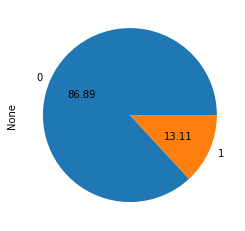

In [ ]:
Total =df_aug.label.count()
zeros = df_aug.label.value_counts()[0]
ones  = df_aug.label.value_counts()[1]
print(f"Dataset contain {round(zeros/Total*100 , 2)} % of label which have zeros")
print(f"Dataset contain {round(ones/Total*100 , 2)} % of label which have ones")

df_aug.groupby('label').size().plot(kind='pie', autopct='%.2f')

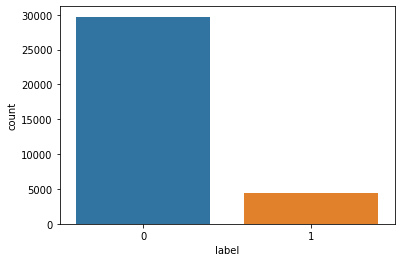

In [ ]:
sns.countplot(df_aug.label)

DATA AUG2 - EN-CA-FR-EN

In [ ]:
translator = Translator()

In [ ]:
text = "It is unbelievable that in the st centuri we would need someth like thi again neverump xenophobia"
print(text)
translation = translator.translate(text, dest='fr')
print(translation.text)

translation = translator.translate(translation.text, dest='en')
print(translation.text)

It is unbelievable that in the st centuri we would need someth like thi again neverump xenophobia
Il est incroyable que, dans le Saint-Centur, nous aurions besoin de quelque chose comme ça de nouveau que ça neveraspump xénophobie
It's amazing that in the Saint-Centur, we would need something like that again that it neveraspump xenophobia


In [ ]:
translator = Translator()
text = "take out the trash america voted against hate voted against voted against vota"
print(text)
translation = translator.translate(text, dest='ca')
print(translation.text)

translation = translator.translate(translation.text, dest='fr')
print(translation.text)


translation = translator.translate(translation.text, dest='en')
print(translation.text)

take out the trash america voted against hate voted against voted against vota
treure els Estats Units votats contra l'odi votat contra el votat contra la vota
Supprimer les États-Unis votés contre la haine votée contre vote voté
Delete the United States voted against hatred voted against voted vote


In [ ]:
def translate_en_ca_fr_en(text):
  translation = translator.translate(text, dest='ca')
  translation = translator.translate(translation.text, dest='fr')
  translation = translator.translate(translation.text, dest='en')
  return translation.text

In [ ]:
def preprocessing_for_DATA_AUG(i):   
    #lowercasing text
    i = i.lower()
    # "won\'t", "will not"  , "can\'t", "can not" , "n\'t", " not"....
    i = decontracted(i)
    #removing @user word
    i = re.sub(r'\s*[@]+\w+\s*', ' ', i)
    # #remove hashtag words
    # i =re.sub(r'\s*[#]+\w+\s*', ' ', i)
    # removing symbols from text
    i = re.sub(r'[^\w]', ' ', i)
    #removing 1 letter word from sentence
    i = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ',i)
    #reomving ! @ # $ ð from sentence
    i = re.sub('[!@#$ðæä¼è]', ' ',i)
    #removing numbers from sentence
    i = re.sub("\d", ' ', i )
    # #removing words which lenght is 10<
    # i = re.sub(r'\b\w{11,50}\b', ' ', i )
    #removing some unique char
    i =  i.replace('_', ' ').replace("-"  , " ").replace("â"  , " ")
    # #removing stopwords
    # i = stopword_removal(i)
    # # converting same meaning words into single word notation
    # i = potter_text(i)
    #removing Extra spaces 
    i = re.sub("\s\s+" , " ", i)
    return i

In [ ]:
clean_text_fordataaug = []
for i in tqdm(df["tweet"]):
  text = preprocessing_for_DATA_AUG(i)
  clean_text_fordataaug.append(text)

df["clean_text_fordataaug"] =clean_text_fordataaug

df.head(2)

100%|██████████| 31962/31962 [00:01<00:00, 19307.44it/s]


,id,label,tweet,clean_tweet,entity,hashtag,clean_text_fordataaug
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct,PERSON,run,when father is dysfunctional and is so selfis...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank credit not use caus not offer wheelchair...,PERSON,lyft disapointed getthanked,thanks for lyft credit can not use cause they...


In [ ]:
data=df[df["label"]==1]

data = data.reset_index()
del data['index']

data.head(2)

,id,label,tweet,clean_tweet,entity,hashtag,clean_text_fordataaug
0,14,1,@user #cnn calls #michigan middle school 'buil...,call middl school build wall chant,,cnn michigan tcot,cnn calls michigan middle school build the wa...
1,15,1,no comment! in #australia #opkillingbay #se...,no comment,,australia opkillingbay seashepherd helpcovedol...,no comment in australia opkillingbay seashephe...


In [ ]:
data_aug_list2 =[]

for text in tqdm(data["clean_text_fordataaug"]):
  try :
    translate = translate_en_ca_fr_en(text)
    data_aug_list2.append(translate)
  except: continue

100%|██████████| 2242/2242 [1:39:26<00:00,  2.66s/it]


In [ ]:
df_aug = pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_aug1.csv")

In [ ]:
len(data_aug_list2)

2078

In [ ]:
df_aug = pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_aug1.csv")

ones = [int(1)] * len(data_aug_list2)

data = np.column_stack((data_aug_list2, ones))

df_aug2 = df_aug.append(pd.DataFrame(data, columns=['clean_text_fordataaug' ,'label']),ignore_index=True)

df_aug2['label'] = df_aug2['label'].astype(int)

In [ ]:
# df_aug2.to_csv(r'/content/drive/MyDrive/Twitter NLP/df_aug2.csv')

In [ ]:
df_aug2 = pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_aug2.csv")

Dataset contain 81.91 % of label which have zeros
Dataset contain 18.09 % of label which have ones


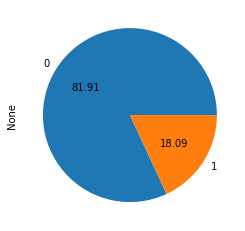

In [ ]:
Total =df_aug2.label.count()
zeros = df_aug2.label.value_counts()[0]
ones  = df_aug2.label.value_counts()[1]
print(f"Dataset contain {round(zeros/Total*100 , 2)} % of label which have zeros")
print(f"Dataset contain {round(ones/Total*100 , 2)} % of label which have ones")

df_aug2.groupby('label').size().plot(kind='pie', autopct='%.2f')

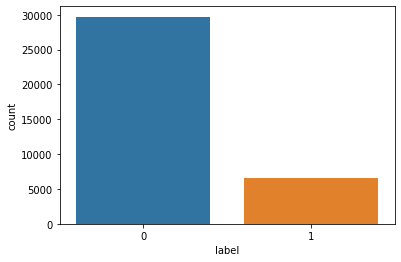

In [ ]:
sns.countplot(df_aug2.label)

DATA AUG BERT

https://medium.com/p/23ce883a0715

https://towardsdatascience.com/data-augmentation-library-for-text-9661736b13ff

In [ ]:
textgenie = TextGenie("ramsrigouthamg/t5_paraphraser",'bert-base-uncased')

Loading Paraphrase Model..


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Loading Mask Fill Model..


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
textgenie.augment_sent_t5("how do i find the area of a circle","paraphrase: ")

['How do I determine the area of an imaginary circle?',
 'How do i find the area of circle?',
 'How do I find the area of a circle?',
 'How do I determine the square area of a circle?',
 'How does one find the area of a circle?']

In [ ]:
df1=df[df["label"]==1]

df1 = df1.reset_index()
del df1['index']

In [ ]:
for i in range(0 , 5):
  print("#"*20)
  print(df1["tweet"][i])
  print(df1["clean_tweet"][i])
  list_text =textgenie.magic_once(df1["clean_tweet"][i],"paraphrase: ",n_paraphrase_predictions=4,n_mask_predictions=10)
  print(list_text[0])
  print(list_text[1])

####################
@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  
call middl school build wall chant
By calling Middl School building wall chanting the name of the organization chanting over the wall and chanting "What are the needs of your school?"
call at school build wall chant
####################
no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins
no comment
I've not written any comments, just follow the link here.
no no
####################
retweet if you agree! 
retweet agre
retweet ;
el agre
####################
@user @user lumpy says i am a . prove it lumpy.
lumpi say prove lumpi
we say prove lumpi
How can a lumpi prove a lumpi?
####################
it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia 
unbeliev st centuri would need someth like
even st centuri would need someth like
unbelievled centuri would need someth like


In [ ]:
def preprocessing_for_DATA_AUG(i):   
    #lowercasing text
    i = i.lower()
    # "won\'t", "will not"  , "can\'t", "can not" , "n\'t", " not"....
    i = decontracted(i)
    #removing @user word
    i = re.sub(r'\s*[@]+\w+\s*', ' ', i)
    # #remove hashtag words
    # i =re.sub(r'\s*[#]+\w+\s*', ' ', i)
    # removing symbols from text
    i = re.sub(r'[^\w]', ' ', i)
    #removing 1 letter word from sentence
    i = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ',i)
    #reomving ! @ # $ ð from sentence
    i = re.sub('[!@#$ð]', ' ',i)
    #removing numbers from sentence
    i = re.sub("\d", ' ', i )
    # #removing words which lenght is 10<
    # i = re.sub(r'\b\w{11,50}\b', ' ', i )
    #removing some unique char
    i =  i.replace('_', ' ').replace("-"  , " ").replace("â"  , "a").replace("ï"  , "i")
    # #removing stopwords
    # i = stopword_removal(i)
    # # converting same meaning words into single word notation
    # i = potter_text(i)
    #removing Extra spaces 
    i = re.sub("\s\s+" , " ", i)
    return i

In [ ]:
clean_text_fordataaug = []
for i in tqdm(df["tweet"]):
  text = preprocessing_for_DATA_AUG(i)
  clean_text_fordataaug.append(text)

df["clean_text_fordataaug"] =clean_text_fordataaug

100%|██████████| 31962/31962 [00:01<00:00, 25174.05it/s]


In [ ]:
df1=df[df["label"]==1]

df1 = df1.reset_index()
del df1['index']

df1.head(2)

,id,label,tweet,clean_tweet,entity,hashtag,clean_text_fordataaug
0,14,1,@user #cnn calls #michigan middle school 'buil...,call middl school build wall chant,,cnn michigan tcot,cnn calls michigan middle school build the wa...
1,15,1,no comment! in #australia #opkillingbay #se...,no comment,,australia opkillingbay seashepherd helpcovedol...,no comment in australia opkillingbay seashephe...


SequenceMatcher score 

In [ ]:
a= "it is unbeliev that in the st centuri we would need someth like thi again neverump xenophobia"
b= "It is unbelievable that in the st centuri we would need someth like thi again neverump xenophobia."
c= "it is unbeliev that in the northern centuri we would need someth like thi again neverump xenophobia"

print(SequenceMatcher(None, a, b).ratio())
print(SequenceMatcher(None, a, c).ratio())

0.9633507853403142
0.9583333333333334


In [ ]:
df1 =df1.sample(frac=1)
df1 = df1.reset_index()

In [ ]:
%%time
for i in range(11 , 20):
  print("#"*20)
  print(df1["tweet"][i])
  print(df1["clean_text_fordataaug"][i])
  list_text =textgenie.magic_once(df1["clean_text_fordataaug"][i] , 
                                  "paraphrase: ",
                                  n_paraphrase_predictions=10,
                                  paraphrase_top_k=50, 
                                  paraphrase_max_length=20, 
                                  n_mask_predictions=10, 
                                  convert_to_active=True)
  print("aug sen")
  count =0
  print("total aug text" ,len(list_text))
  for j in list_text:
    count+=1
    score = round(SequenceMatcher(None,df1["clean_text_fordataaug"][i], j).ratio() , 2)
    if score >=0.70 and score <=0.90 :
      print("score  :" , score)
      print("count  :" ,count)
      print(j)
      break

####################
are you #hispanic &amp; â¦ like the  are stomping on you? listen  #retweet #boricua #miamiâ¦ 
are you hispanic amp a like the are stomping on you listen retweet boricua miamia 
aug sen
total aug text 50
score  : 0.8
count  : 4
are you Hispanic amp a like the Are stomping on you listen
####################
are you #hispanic &amp; feel â¦ the  are stomping on you? listen  #retweet #boricua #miamiâ¦ 
are you hispanic amp feel a the are stomping on you listen retweet boricua miamia 
aug sen
total aug text 61
score  : 0.76
count  : 10
Is you hispanic amp feel a are stomping on you listen
####################
@user u lose ur right 2 call others "racist" after a tweet like this. what a hypocrite.  #whitegenocide 
 lose ur right call others racist after tweet like this what hypocrite whitegenocide 
aug sen
total aug text 61
score  : 0.9
count  : 10
lose ur right call others racist after tweet like this what hypocrite |
####################
@user all of you need to stop

In [ ]:
aug_list = []
for i in tqdm(range(0 , 500)):

  list_text =textgenie.magic_once(df1["clean_text_fordataaug"][i] , 
                                  "paraphrase: ",
                                  n_paraphrase_predictions=10,
                                  n_mask_predictions=10   ,
                                  paraphrase_max_length=30)

  for j in list_text:

    score = round(SequenceMatcher(None,df1["clean_text_fordataaug"][i], j).ratio() , 2)

    if score >=0.70 and score <=0.90 :
      aug_list.append(j)
      break

100%|██████████| 500/500 [51:42<00:00,  6.21s/it]


In [ ]:
df_aug2 = pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_aug2.csv")

ones = [int(1)] * len(aug_list)

data = np.column_stack((aug_list, ones))

df_aug3 = df_aug2.append(pd.DataFrame(data, columns=['clean_text_fordataaug' ,'label']),ignore_index=True)

df_aug3['label'] = df_aug3['label'].astype(int)

Dataset contain 81.91 % of label which have zeros
Dataset contain 19.42 % of label which have ones


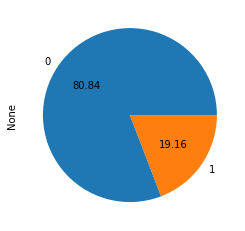

In [ ]:
Total =df_aug2.label.count()
zeros = df_aug3.label.value_counts()[0]
ones  = df_aug3.label.value_counts()[1]
print(f"Dataset contain {round(zeros/Total*100 , 2)} % of label which have zeros")
print(f"Dataset contain {round(ones/Total*100 , 2)} % of label which have ones")

df_aug3.groupby('label').size().plot(kind='pie', autopct='%.2f')

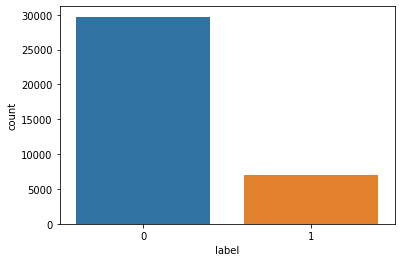

In [ ]:
sns.countplot(df_aug3.label)

In [ ]:
# df_aug3.to_csv(r'/content/drive/MyDrive/Twitter NLP/df_aug3.csv')